In [1]:
import numpy as np
import matplotlib.pyplot as plt


output_1h_solar = np.genfromtxt('test_results/outputs_solar_1h.csv', delimiter=',')
output_24h_solar = np.genfromtxt('test_results/solar_outputs_24h.csv', delimiter=',')
output_1h_wind = np.genfromtxt('test_results/wind_outputs_1h.csv', delimiter=',')
output_24h_wind = np.genfromtxt('test_results/outputs_wind_24h.csv', delimiter=',')

target_1h_solar = np.genfromtxt('test_results/targets_solar_1h.csv', delimiter=',')
target_24h_solar = np.genfromtxt('test_results/solar_targets_24h.csv', delimiter=',')
target_1h_wind = np.genfromtxt('test_results/wind_targets_1h.csv', delimiter=',')
target_24h_wind = np.genfromtxt('test_results/targets_wind_24h.csv', delimiter=',')

In [2]:
test_data = np.genfromtxt('data/test_data/test_solar2.csv', delimiter=',',skip_header=1)

In [3]:
# get first column of test data

test_data.shape

(8760, 11)

In [4]:
def move_sliding_window(data, window_size, inputs_cols_indices, label_col_index, forecast_horizon=24):
    """
    data: numpy array including data
    window_size: size of window
    inputs_cols_indices: col indices to include
    label_col_index: index of the label column in data
    forecast_horizon: number of time steps ahead to predict
    """

    # Calculate the number of instances based on the available data minus the window size and forecast horizon
    num_instances = len(data) - window_size - forecast_horizon + 1

    # (# instances created by movement, seq_len (timestamps), # features (input_len))
    inputs = np.zeros((num_instances, window_size, len(inputs_cols_indices)))
    labels = np.zeros(num_instances)

    for i in range(num_instances):
        inputs[i] = data[i:i + window_size, inputs_cols_indices]
        labels[i] = data[i + window_size + forecast_horizon - 1, label_col_index]  # Label is forecast_horizon steps ahead

    inputs = inputs.reshape(-1, window_size, len(inputs_cols_indices))
    labels = labels.reshape(-1, 1)
    print(inputs.shape, labels.shape)
    return inputs, labels

In [5]:
_, t= move_sliding_window(test_data, 25, range(11), 0, 1)
_, t2 = move_sliding_window(test_data, 72, range(11), 0, 24)

(8735, 25, 11) (8735, 1)
(8665, 72, 11) (8665, 1)


In [6]:
predicted_labels = t.flatten()  # Flatten t for easier indexing

# Calculate starting index for the comparison in test_data
start_index = 25  # Since the label for the first window is at index 24

# Extract the actual labels from test_data that should match predicted labels
actual_labels = test_data[start_index:start_index + len(predicted_labels), 0]

# Find indices where the predictions do not match the actual data
non_matching_indices = np.where(predicted_labels != actual_labels)[0]

# Print non-matching indices and the values
print("Non-matching indices:", non_matching_indices)
for idx in non_matching_indices:
    print(f"Index {idx} -> Predicted: {predicted_labels[idx]}, Actual: {actual_labels[idx]}")

Non-matching indices: []


In [9]:
predicted_labels = t2.flatten()  # Flatten t2 for easier indexing

# Calculate starting index for the comparison in test_data
start_index = 72+23  # Since the label for the first window is at index 47 (24 window size + 23 hours in between)

# Extract the actual labels from test_data that should match predicted labels
actual_labels = test_data[start_index:start_index + len(predicted_labels), 0]

# Find indices where the predictions do not match the actual data
non_matching_indices = np.where(predicted_labels != actual_labels)[0]

# Print non-matching indices and the values
print("Non-matching indices:", non_matching_indices)
for idx in non_matching_indices:
    print(f"Index {idx} -> Predicted: {predicted_labels[idx]}, Actual: {actual_labels[idx]}")

Non-matching indices: []


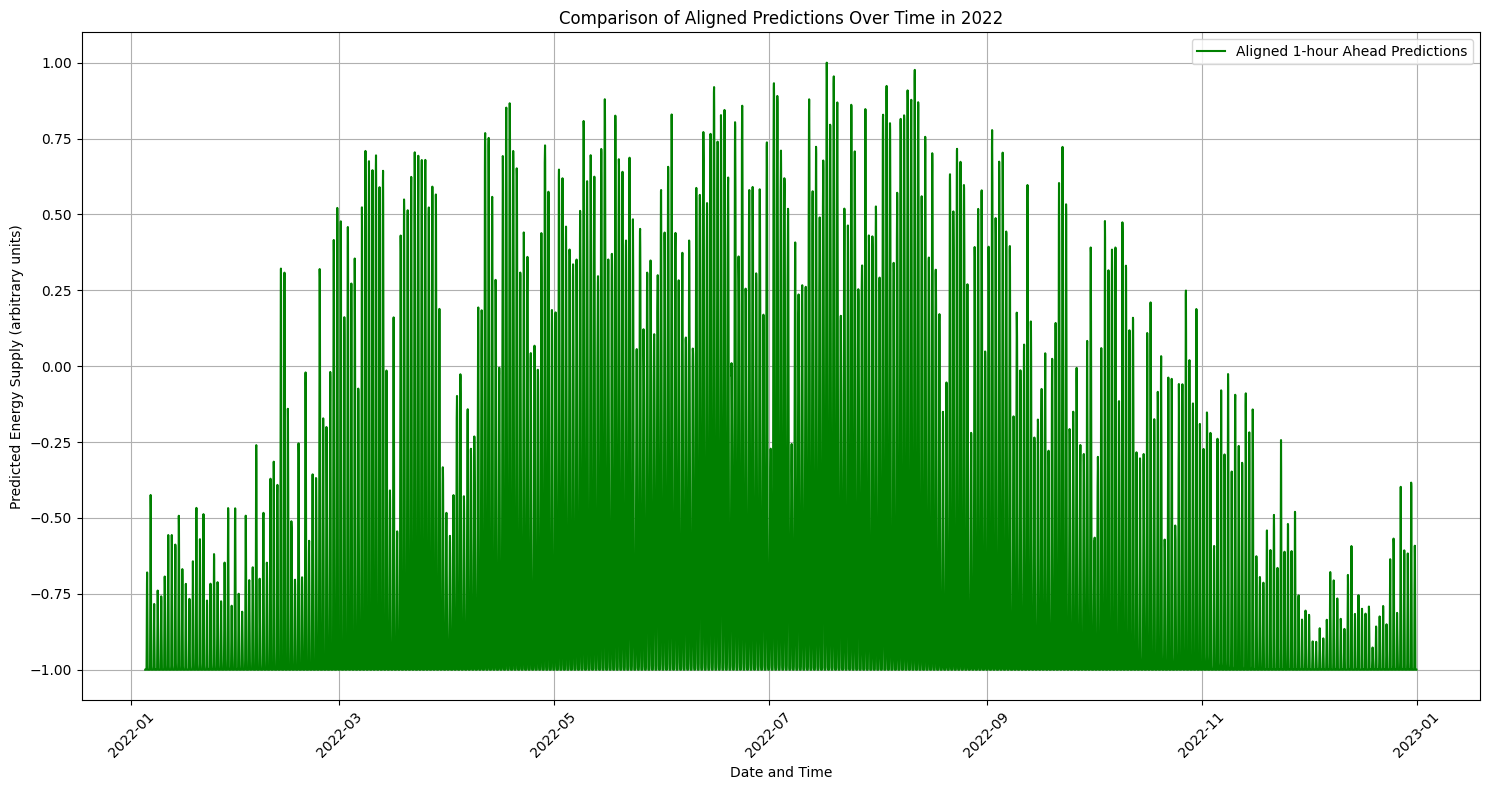

In [11]:
import numpy as np
import pandas as pd

# Assuming t and t2 are loaded as described, and test_data is available.

# Offset for t to match the timing of t2
t_offset = 70  # t2 starts 70 hours later than t in terms of corresponding predictions

# Truncate t to match length of t2 (if necessary)
t_aligned = t[t_offset : t_offset + len(t2)]

# Corresponding indices in test_data for t2
start_index_t2 = 95  # t2 starts at index 95 in terms of initial data window + forecast
end_index_t2 = start_index_t2 + len(t2)

# Generate timestamps for each entry in t2
base_date = pd.Timestamp('2022-01-01 00:00')
timestamps = [base_date + pd.Timedelta(hours=h) for h in range(start_index_t2, end_index_t2)]

# Example Plotting (if needed)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(timestamps, t_aligned.flatten(), label='Aligned 1-hour Ahead Predictions', color='green')
plt.plot(timestamps, t2.flatten(), label='24-hours Ahead Predictions', color='red')
plt.title('Comparison of Aligned Predictions Over Time in 2022')
plt.xlabel('Date and Time')
plt.ylabel('Predicted Energy Supply (arbitrary units)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
